## Goals
### Primary Goal: Identify whether there is a bottle
### Stretched Goal: Identify what type of bottle it is

In [79]:
from utils import *
from random import randint
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
import time
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import tensorflow as tf
import os
import pandas as pd
from fastai.vision import *
from pathlib import Path


In [80]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# device = torch.device("cpu") 
default_epoch = 15

In [81]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
    
def show(X):
    plt.imshow(np.transpose(X.numpy(), (1,2,0)))
    plt.show()

In [313]:
# Normalize and resize the images
transform = torch.nn.Sequential(
    transforms.Resize((128,64)),
    transforms.Normalize((0.5690, 0.5610, 0.5173), (0.2864, 0.2673, 0.2858))    
)  # Normalised values obtained from training dataset.

In [297]:
onlyfiles_bottle = [f for f in os.listdir('data/Bottle')]
print(type(onlyfiles_bottle))
print(len(onlyfiles_bottle))

onlyfiles_nobottle = [f for f in os.listdir('data/NoBottle2')]
print(len(onlyfiles_nobottle))

<class 'list'>
1014
2097


In [314]:
# Bottle
onlyfiles_bottle = [f for f in os.listdir('data/Bottle')]
print(type(onlyfiles_bottle))
print(len(onlyfiles_bottle))

samples_bottle = []
for i, filenames in enumerate(onlyfiles_bottle):
    samples_bottle.append([filenames, 1])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_bottle))
samples_bottle = np.array(samples_bottle)

print(type(samples_bottle))
print(len(samples_bottle))

test_data_bottle = samples_bottle[p[:300]][:,0]
test_labels_bottle = samples_bottle[p[:300]][:,1]
train_data_bottle = samples_bottle[p[300:]][:,0]
train_labels_bottle = samples_bottle[p[300:]][:,1]

print(len(test_data_bottle))
print(len(train_data_bottle))

print(test_data_bottle[0])

#img = pil_loader('data/Bottle/' + train_data_bottle[0])
#print(img)
#img = transforms.Resize(128)(img)
#img = transforms.ToTensor()(img)
#print(img.size())
#img = pil_loader('data/Bottle/' + train_data_bottle[1])
#print(img)
#img = transforms.Resize(128)(img)
#img = transforms.ToTensor()(img)
#print(img.size())

def getBottle(train, index):
    if train:
        img_path, label = train_data_bottle[index], train_labels_bottle[index]
    else:
        img_path, label = test_data_bottle[index], test_labels_bottle[index]

    img = pil_loader('data/Bottle/' + img_path)
    
    #img = transforms.Resize(32)(img)
    img = transforms.Resize((128,64))(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

<class 'list'>
1014
<class 'numpy.ndarray'>
1014
300
714
image2020-02-18 00_06_11.733850.jpg


In [315]:
# No bottle
onlyfiles_nobottle = [f for f in os.listdir('data/NoBottle2')]
print(len(onlyfiles_nobottle))

samples_nobottle = []
for i, filenames in enumerate(onlyfiles_nobottle):
    samples_nobottle.append([filenames, 0])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_nobottle))
samples_nobottle = np.array(samples_nobottle)

print(type(samples_nobottle))
print(len(samples_nobottle))

test_data_nobottle = samples_nobottle[p[:600]][:,0]
test_labels_nobottle = samples_nobottle[p[:600]][:,1]
train_data_nobottle = samples_nobottle[p[600:]][:,0]
train_labels_nobottle = samples_nobottle[p[600:]][:,1]

print(len(test_data_nobottle))
print(len(train_data_nobottle))

def getNoBottle(train, index):
    if train:
        img_path, label = train_data_nobottle[index], train_labels_nobottle[index]
    else:
        img_path, label = test_data_nobottle[index], test_labels_nobottle[index]

    img = pil_loader('data/NoBottle2/' + img_path)
    #img = transforms.Resize(32)(img)
    img = transforms.Resize((128,64))(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

2097
<class 'numpy.ndarray'>
2097
600
1497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bottle Train Image


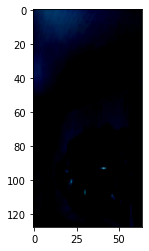

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(tensor([[[-0.7407, -0.6996, -0.6585,  ..., -0.9187, -0.9324, -0.9735],
         [-0.7133, -0.6859, -0.6585,  ..., -0.9050, -0.9050, -0.9324],
         [-0.6722, -0.6585, -0.6449,  ..., -0.8913, -0.8913, -0.9187],
         ...,
         [-0.8502, -0.8366, -0.8229,  ..., -1.0693, -1.0556, -1.0967],
         [-0.8366, -0.8092, -0.7955,  ..., -1.0830, -1.0693, -1.0967],
         [-0.8229, -0.8092, -0.7955,  ..., -1.0830, -1.0693, -1.0967]],

        [[ 0.0285,  0.0725,  0.1166,  ..., -0.2209, -0.2209, -0.2649],
         [ 0.0432,  0.0725,  0.1019,  ..., -0.1915, -0.1915, -0.2209],
         [ 0.0579,  0.0725,  0.0872,  ..., -0.1915, -0.1769, -0.2062],
         ...,
         [-0.3382, -0.3236, -0.3089,  ..., -0.4409, -0.4116, -0.4556],
         [-0.3236, -0.2942, -0.2796,  ..., -0.4409, -0.4263, -0.4556],
         [-0.3089, -0.2942, -0.2796,  ..., -0.4409, -0.4263, -0.4556]],

        [[ 0.2070,  0.2482,  0.2894,  ...,  0.0012,  0.0012, -0.0399],
         [ 0.2345,  0.2482,  0.2756,  ...,  

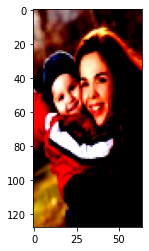

In [316]:
print("Bottle Train Image")
bottle_train_img = getBottle(train=True, index=0)
show(bottle_train_img[0])
print(bottle_train_img)
print(type(bottle_train_img))

print("No Bottle Train Image")
nobottle_train_img = getNoBottle(train=True, index=0)
show(nobottle_train_img[0])

In [317]:
#bottle_train_data = getNoBottle(train=True, index=i)
train_data = []
for i in range(714):
    train_data.append(getBottle(train=True, index=i))
for i in range(1497):
    train_data.append(getNoBottle(train=True, index=i))
print(len(train_data))  

test_data = []
for i in range(300):
    test_data.append(getBottle(train=False, index=i))
for i in range(600):
    test_data.append(getNoBottle(train=False, index=i))
print(len(test_data))

print(type(getBottle(train=True, index=0)))
print(type(train_data))

2211
900
<class 'tuple'>
<class 'list'>


In [318]:
print(train_data[0][0].size())
print(train_data[1][0].size())

torch.Size([3, 128, 64])
torch.Size([3, 128, 64])


In [319]:
# Load into dataloader for easier batching
bs = 64
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=bs)

In [312]:
# Getting the mean and std across all three channels for normalisation. Run only once.
means = []
stds = []
for i in train_data:
    means.append((i[0]))
    stds.append(i[0])
test =  torch.cat(means)
test = test.view(-1,3,128,64)
print(test.mean(axis=(0,2,3)))
print(test.std(axis=(0,2,3)))

tensor([0.5690, 0.5610, 0.5173])
tensor([0.2864, 0.2673, 0.2858])


In [320]:
# MLP
class BaseMLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(BaseMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.layer4 = nn.Linear(hidden_size3, output_size)
        
    def forward(self, x):
        x = x.view(-1,24576)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        x = torch.relu(x)
        x = self.layer4(x)
        return x
    
# CNN
class BaseCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseCNN, self).__init__()
        self.output_size = output_size
        self.conv1 = nn.Conv2d(input_size, hidden_size, kernel_size = 3, stride = 2, padding = 1) #3*128*64 -> 8*64*32
        self.conv2 = nn.Conv2d(hidden_size, output_size, kernel_size = 3,stride =2, padding = 1) #8*64*32 -> 16*32*16
        self.linearlayer1 = nn.Linear(output_size*32*16, 2)                                     #16*32*16 -> 1*8192
        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(-1, self.output_size*32*16)
        x = self.linearlayer1(x)
        return x
        
#basemlp = BaseMLP(3*128*64, 128, 64, 32, 2)
#basecnn = BaseCNN(3, 8, 16)

In [321]:
def init_list():
    """
    init an empty list of list for data storage"""
    lst = [] 
    for i in range(8):
        lst.append([]) 
    return lst

In [322]:
# Training function
def train(epochs, dataloader, testdataloader, model, lr, loss_class, opt, out_result = init_list()):
    start = time.time()
    for i in range(epochs):
        validation_loss = 0.0
        running_loss = 0.0
        num_batches = 0
        for batch_idx, [data, label] in enumerate(dataloader):
            opt.zero_grad()
            label = [int(x) for x in label]
            label = torch.LongTensor(label)
            if str(device.type) == "cuda" :
                data, label = data.cuda(), label.cuda()
            else :
                data, label = data.cpu(), label.cpu()     
                
            scores = model(data)
            loss = loss_class(scores, label)
            loss.backward()
            opt.step()
            

            running_loss += loss.detach().item()
            num_batches += 1
            
        total_loss = running_loss/num_batches
        print(f'epoch={i + 1},\t lr={lr},\t loss={total_loss}')
        
        eval(model, testdataloader, out_result)
    print(f'Time elapsed:{time.time()-start}')
    out_result.append(time.time()-start)

In [323]:
# Testing code
def eval(model, setloader, out_result = init_list()):
    correct_count = 0
    total_count = 0
    
    prediction = torch.zeros(0).cpu()
    truth = torch.zeros(0).cpu()
    
#    if is_on_cuda :
#        prediction = torch.zeros(0).cuda()
#        truth = torch.zeros(0).cuda()
    
    for batch_idx, [data, label] in enumerate(setloader):
        label = torch.LongTensor([int(x) for x in label])
        if str(device.type) == "cuda" :
            data, label = data.cuda(), label.cuda()
            print("cuda is on")
        else :
            data, label = data.cpu(), label.cpu()
        
        probs = model(data)
        probs = nn.Softmax(dim=1)(probs)
        pred = torch.argmax(probs, dim=1)
        
        # Result collection
#         correct_count += torch.sum(label==pred).detach().item()
#         total_count += len(data)
        prediction = torch.cat((prediction, pred),dim=0)
        truth = torch.cat((truth, label),dim=0)
        #print(torch.sum(label==pred).detach().item())
        
    # Results calculation here
    prediction, truth = prediction.detach(), truth.detach()
    #display.metrics(prediction, truth)
    calculate(prediction, truth, out_result)

In [324]:
def calculate(prediction, truth, out):
    """
    Takes in a tensor of predictions and a tensor of labels.
    Store tp, fp, tn, fn, acc, precision, recall ,f1 in this order."""
    acc = torch.sum(prediction==truth).item() / len(prediction)
    confusion_vector = prediction/truth
    tp = torch.sum(confusion_vector == 1).item()
    fp = torch.sum(confusion_vector == float('inf')).item()
    tn = torch.sum(torch.isnan(confusion_vector)).item()
    fn = torch.sum(confusion_vector == 0).item()
    precision = 0 if (tp+fp) == 0 else tp/(tp+fp)
    recall = 0 if (tp+fn) == 0 else tp/(tp+fn)
    f1 = 0 if (precision+recall) == 0 else 2*precision*recall/(precision+recall)
    out[0].append(float(tp))
    out[1].append(float(fp))
    out[2].append(float(tn))
    out[3].append(float(fn))
    out[4].append(acc)
    out[5].append(precision)
    out[6].append(recall)
    out[7].append(f1)

In [325]:
baseCNN = BaseCNN(3, 8, 16).to(device)    
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseCNN.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_cnn = init_list()
train(epoch, train_dataloader, test_dataloader, baseCNN, lr, loss_class, opt, result_base_cnn)

epoch=1,	 lr=0.001,	 loss=0.2279309329177652
epoch=2,	 lr=0.001,	 loss=0.08796711532132966
epoch=3,	 lr=0.001,	 loss=0.06132486773920911
epoch=4,	 lr=0.001,	 loss=0.048404840832310066
epoch=5,	 lr=0.001,	 loss=0.045659428502299954
epoch=6,	 lr=0.001,	 loss=0.0419252139782267
epoch=7,	 lr=0.001,	 loss=0.03206563396379351
epoch=8,	 lr=0.001,	 loss=0.02360239000990987
epoch=9,	 lr=0.001,	 loss=0.019712407225077704
epoch=10,	 lr=0.001,	 loss=0.016966440824658743
epoch=11,	 lr=0.001,	 loss=0.025832133580531394
epoch=12,	 lr=0.001,	 loss=0.014968914811366371
epoch=13,	 lr=0.001,	 loss=0.021943282851550196
epoch=14,	 lr=0.001,	 loss=0.012728823267389089
epoch=15,	 lr=0.001,	 loss=0.010145479450667544
Time elapsed:22.69243812561035


In [326]:
eval(baseCNN, test_dataloader)

In [327]:
baseMLP = BaseMLP(3*128*64, 128, 64, 32, 2).to(device)
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseMLP.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_mlp = init_list()
train(epoch, train_dataloader, test_dataloader, baseMLP, lr, loss_class, opt, result_base_mlp)

epoch=1,	 lr=0.001,	 loss=0.27886598482728003
epoch=2,	 lr=0.001,	 loss=0.1434034055897168
epoch=3,	 lr=0.001,	 loss=0.07477997195507799
epoch=4,	 lr=0.001,	 loss=0.06659535760326045
epoch=5,	 lr=0.001,	 loss=0.061898852359237415
epoch=6,	 lr=0.001,	 loss=0.07338862441081022
epoch=7,	 lr=0.001,	 loss=0.02187365470786712
epoch=8,	 lr=0.001,	 loss=0.015234796802646347
epoch=9,	 lr=0.001,	 loss=0.015638460857527597
epoch=10,	 lr=0.001,	 loss=0.010252919782318973
epoch=11,	 lr=0.001,	 loss=0.011271880081455623
epoch=12,	 lr=0.001,	 loss=0.045457181217664455
epoch=13,	 lr=0.001,	 loss=0.011044149509065652
epoch=14,	 lr=0.001,	 loss=0.012455237144604326
epoch=15,	 lr=0.001,	 loss=0.008566065243212507
Time elapsed:5.984308958053589


In [328]:
eval(baseMLP, test_dataloader)

In [329]:
# Alexnet
import gc
gc.collect()
alexnet = models.alexnet().to(device)  #lowest val loss 0.55
lr = 0.0001 
opt = torch.optim.Adam(alexnet.parameters(), lr=lr)
epoch = 15
loss_class = nn.CrossEntropyLoss()

result_alexnet = init_list()
train(epoch, train_dataloader,test_dataloader, alexnet, lr, loss_class, opt, result_alexnet)

epoch=1,	 lr=0.0001,	 loss=1.5920462821211134
epoch=2,	 lr=0.0001,	 loss=0.319140208193234
epoch=3,	 lr=0.0001,	 loss=0.13907974500741277
epoch=4,	 lr=0.0001,	 loss=0.0995343783072063
epoch=5,	 lr=0.0001,	 loss=0.046088796561317785
epoch=6,	 lr=0.0001,	 loss=0.030148733831343373
epoch=7,	 lr=0.0001,	 loss=0.036891329296798045
epoch=8,	 lr=0.0001,	 loss=0.019140137043515488
epoch=9,	 lr=0.0001,	 loss=0.015131429908797145
epoch=10,	 lr=0.0001,	 loss=0.012913901757981096
epoch=11,	 lr=0.0001,	 loss=0.008147735078819097
epoch=12,	 lr=0.0001,	 loss=0.017018393110317578
epoch=13,	 lr=0.0001,	 loss=0.008529730152804404
epoch=14,	 lr=0.0001,	 loss=0.0065532092050749014
epoch=15,	 lr=0.0001,	 loss=0.019121363297121465
Time elapsed:786.527293920517


In [330]:
eval(alexnet, test_dataloader)

In [331]:
# vgg16
vgg16 = models.vgg16().to(device)
lr = 0.0001
opt = torch.optim.Adam(vgg16.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()


result_vgg16 = init_list()
train(epoch, train_dataloader, test_dataloader, vgg16, lr, loss_class, opt, result_vgg16)

epoch=1,	 lr=0.0001,	 loss=1.0568401149341038
epoch=2,	 lr=0.0001,	 loss=0.17224921344646385
epoch=3,	 lr=0.0001,	 loss=0.10532416634793793
epoch=4,	 lr=0.0001,	 loss=0.09331347348966769
epoch=5,	 lr=0.0001,	 loss=0.06946042478084564
epoch=6,	 lr=0.0001,	 loss=0.03904931735846081
epoch=7,	 lr=0.0001,	 loss=0.036543731501192916
epoch=8,	 lr=0.0001,	 loss=0.030032839126943146
epoch=9,	 lr=0.0001,	 loss=0.007830501722076276
epoch=10,	 lr=0.0001,	 loss=0.01770469584818264
epoch=11,	 lr=0.0001,	 loss=0.02693287053095576
epoch=12,	 lr=0.0001,	 loss=0.013068427818195363
epoch=13,	 lr=0.0001,	 loss=0.0042694476819763495
epoch=14,	 lr=0.0001,	 loss=0.010192032819733347
epoch=15,	 lr=0.0001,	 loss=0.019210977135142977
Time elapsed:17545.723383903503


In [332]:
eval(vgg16, test_dataloader)

In [333]:
# Squeezenet1_1
import gc
gc.collect()

squeezenet1_1 = models.squeezenet1_1().to(device)
lr = 0.0003
opt = torch.optim.Adam(squeezenet1_1.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_squeezenet1_1 = init_list()
train(epoch, train_dataloader,test_dataloader, squeezenet1_1, lr, loss_class, opt, result_squeezenet1_1)

epoch=1,	 lr=0.0003,	 loss=1.7359138607978821
epoch=2,	 lr=0.0003,	 loss=0.28551848999091556
epoch=3,	 lr=0.0003,	 loss=0.14619649701884815
epoch=4,	 lr=0.0003,	 loss=0.10297733076981136
epoch=5,	 lr=0.0003,	 loss=0.10468991048234914
epoch=6,	 lr=0.0003,	 loss=0.06339680519221084
epoch=7,	 lr=0.0003,	 loss=0.03554920267446765
epoch=8,	 lr=0.0003,	 loss=0.04247004744413841
epoch=9,	 lr=0.0003,	 loss=0.037702596026273176
epoch=10,	 lr=0.0003,	 loss=0.04483267494111455
epoch=11,	 lr=0.0003,	 loss=0.03418930005947394
epoch=12,	 lr=0.0003,	 loss=0.015805522515438496
epoch=13,	 lr=0.0003,	 loss=0.027326411555155312
epoch=14,	 lr=0.0003,	 loss=0.01659252300160006
epoch=15,	 lr=0.0003,	 loss=0.005616819642559026
Time elapsed:212.7490518093109


In [334]:
eval(squeezenet1_1, test_dataloader)

In [335]:
def comparison_graph(title, y_label, x_label, results, result_index, labels, markers): 
	# plot
	fig, ax = plt.subplots()
	fig.set_size_inches(10, 5)
	max_x = 0
	for i in range(len(labels)): 
		# make epoc list
		x = array = np.arange(1, len(results[i][result_index])+1)
		max_x = max(max_x, len(results[i][result_index]))
		ax.plot(x, results[i][result_index], linewidth=1.0, label=labels[i], marker = markers[i])
	ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
	ax.set(xlabel= x_label, ylabel= y_label, title=title, xlim=(0, max_x + 0.5), xticks=np.arange(1, max_x + 1))
	plt.show()

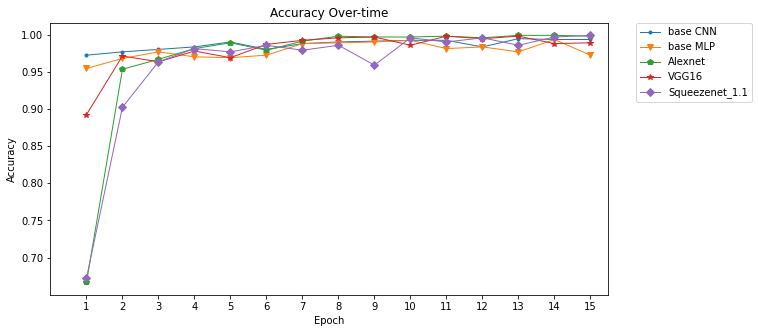

In [336]:
results = [result_base_cnn, result_base_mlp, result_alexnet, result_vgg16, result_squeezenet1_1]
labels = ["base CNN", "base MLP", "Alexnet", "VGG16", "Squeezenet_1.1"]
markers = [".","v","p","*","D"] 

comparison_graph("Accuracy Over-time", "Accuracy", "Epoch", results, 4, labels, markers)

In [337]:
final_result_baseCNN = init_list();
final_result_baseMLP = init_list();
final_result_alexnet = init_list();
final_result_vgg16 = init_list();
final_result_squeezenet1_1 = init_list();

print('baseCNN')
start = time.time()
eval(baseCNN, test_dataloader, final_result_baseCNN)
final_result_baseCNN.append((time.time()-start)/ len(test_data))

start = time.time()
print('baseMLP')
eval(baseMLP, test_dataloader, final_result_baseMLP)
final_result_baseMLP.append((time.time()-start)/ len(test_data))

start = time.time()
print('AlexNet')
eval(alexnet, test_dataloader, final_result_alexnet)
final_result_alexnet.append((time.time()-start)/ len(test_data))

start = time.time()
print('VGG16')
eval(vgg16, test_dataloader, final_result_vgg16)
final_result_vgg16.append((time.time()-start)/ len(test_data))

start = time.time()
print('Squeezenetv1.1')
eval(squeezenet1_1, test_dataloader, final_result_squeezenet1_1)
final_result_squeezenet1_1.append((time.time()-start)/ len(test_data))

baseCNN
baseMLP
AlexNet
VGG16
Squeezenetv1.1


In [338]:
def bar_graph(title, x_label, y_label, results, result_index, labels): 
    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 4)
    max_x = 0
    values = []
    for i in range(len(labels)): 
        values.append(results[i][result_index])

    ax.barh(labels, values)
    ax.set(xlabel= x_label, ylabel= y_label, title=title)
    plt.show()

In [339]:
final_results = [final_result_baseCNN, final_result_baseMLP, final_result_alexnet,
           final_result_vgg16, final_result_squeezenet1_1]

final_labels = ["base CNN", "base MLP", "Alexnet", "VGG16", "Squeezenet_1.1"]

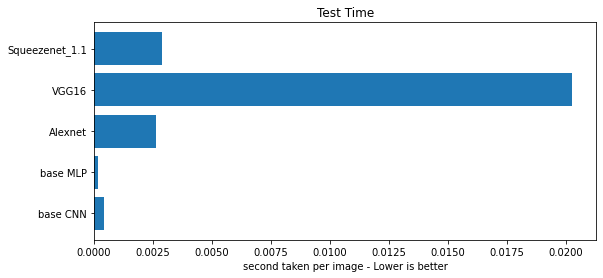

In [340]:
bar_graph("Test Time", "second taken per image - Lower is better", "", final_results, 8, final_labels)

In [343]:
test_img_path = 'bottle.jpeg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)

tensor([0.])


In [ ]:
# NoBottle
onlyfiles_random = [f for f in os.listdir('data/Random')]
print(type(onlyfiles_random))
print(len(onlyfiles_random))

samples_random = []
for i, filenames in enumerate(onlyfiles_random):
    samples_random.append([filenames, 0])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_random))
samples_bottle = np.array(samples_random)

print(type(samples_bottle))
print(len(samples_bottle))

test_data_bottle = samples_bottle[p[:304]][:,0]
test_labels_bottle = samples_bottle[p[:304]][:,1]
train_data_bottle = samples_bottle[p[304:]][:,0]
train_labels_bottle = samples_bottle[p[304:]][:,1]

print(len(test_data_bottle))
print(len(train_data_bottle))

print(test_data_bottle[0])

def getBottle(train, index):
    if train:
        img_path, label = train_data_bottle[index], train_labels_bottle[index]
    else:
        img_path, label = test_data_bottle[index], test_labels_bottle[index]

    img = pil_loader('data/Bottle/' + img_path)
    
    #img = transforms.Resize(32)(img)
    img = transforms.Resize(128)(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label